In [1]:
import os
import re

import pandas as pd
import tensorflow as tf
from tensorflow.keras import utils

In [2]:
dataset = tf.keras.utils.get_file(
      fname="imdb.tar.gz", 
      origin="http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz", 
      extract=True)

In [3]:
def loadData(dir):
    posDf = loadDirectoryData(os.path.join(dir, "pos"))
    negDf = loadDirectoryData(os.path.join(dir, "neg"))
    posDf["sentiment"] = 1
    negDf["sentiment"] = 0
    
    return pd.concat([posDf, negDf]).sample(frac=1).reset_index(drop=True)

In [4]:
def loadDirectoryData(dir):
    data = {}
    data["review"] = []
    for filePath in os.listdir(dir):
        with open(os.path.join(dir, filePath), "r") as file:
            data["review"].append(file.read())
            
    return pd.DataFrame.from_dict(data)

In [5]:
trainDf = loadData(os.path.join(os.path.dirname(dataset), "aclImdb", "train"))
testDf = loadData(os.path.join(os.path.dirname(dataset), "aclImdb", "test"))

In [6]:
trainDf.head()

,review,sentiment
0,The acting in this movie stinks. The plot make...,0
1,"Hard to believe, perhaps, but this film was de...",1
2,"Humm, an Italian movie starred by David hassel...",0
3,A fine effort for an Australian show. which is...,1
4,I thought that it was a great film for kids ag...,1


In [7]:
reviews = list(trainDf['review'])

# EDA

### 데이터 카운트 리스트 생성

In [8]:
# 문자열 문장 리스트를 토크나이즈
tokenizedReviews = [r.split() for r in reviews]

In [9]:
# 토크나이즈 된 리스트에 대한 각 길이를 저장
reviewLenByToken = [len(t) for t in tokenizedReviews]

In [10]:
# 토크나이즈 된 것을 붙여서 음절의 길이를 저장
reviewLenByEumjeol = [len(s.replace(' ', '')) for s in reviews]

In [11]:
import matplotlib.pyplot as plt

# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(reviewLenByToken, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(reviewLenByEumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')
# 그래프 제목
plt.title('Review Length Histogram')
# 그래프 x 축 라벨
plt.xlabel('Review Length')
# 그래프 y 축 라벨
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

In [12]:
import numpy as np

print('문장 최대길이: {}'.format(np.max(reviewLenByToken)))
print('문장 최소길이: {}'.format(np.min(reviewLenByToken)))
print('문장 평균길이: {:.2f}'.format(np.mean(reviewLenByToken)))
print('문장 길이 표준편차: {:.2f}'.format(np.std(reviewLenByToken)))
print('문장 중간길이: {}'.format(np.median(reviewLenByToken)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('제 1 사분위 길이: {}'.format(np.percentile(reviewLenByToken, 25)))
print('제 3 사분위 길이: {}'.format(np.percentile(reviewLenByToken, 75)))

문장 최대길이: 2470
문장 최소길이: 10
문장 평균길이: 233.79
문장 길이 표준편차: 173.73
문장 중간길이: 174.0
제 1 사분위 길이: 127.0
제 3 사분위 길이: 284.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfcc421470>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfcc421b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfcc3ea0f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfcc41b1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfcc41b828>],
 'means': [<matplotlib.lines.Line2D at 0x7fcfcc41b518>]}

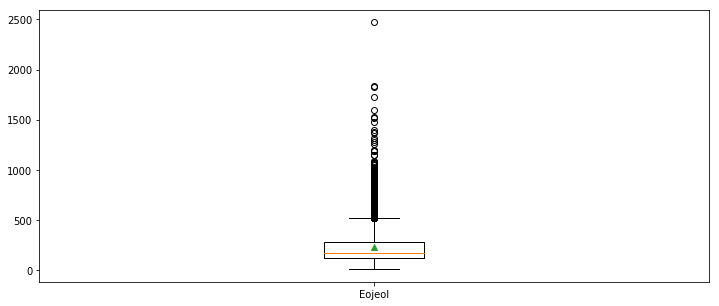

In [13]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot([reviewLenByToken],
             labels=['Eojeol'],
             showmeans=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcfcc3a1400>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcfcc3a1a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcfe1fd1a58>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcfcc3aa160>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcfcc3aa7b8>],
 'means': [<matplotlib.lines.Line2D at 0x7fcfcc3aa4a8>]}

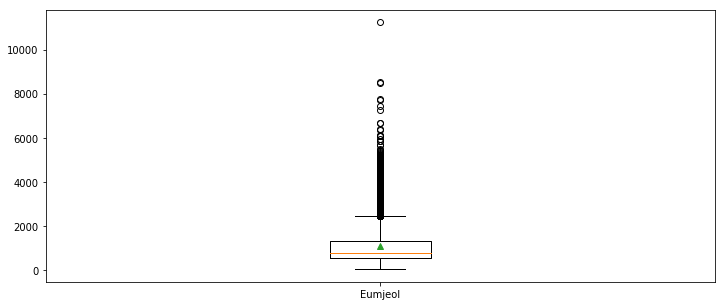

In [14]:
plt.figure(figsize=(12, 5))
plt.boxplot([reviewLenByEumjeol],
             labels=['Eumjeol'], 
             showmeans=True)

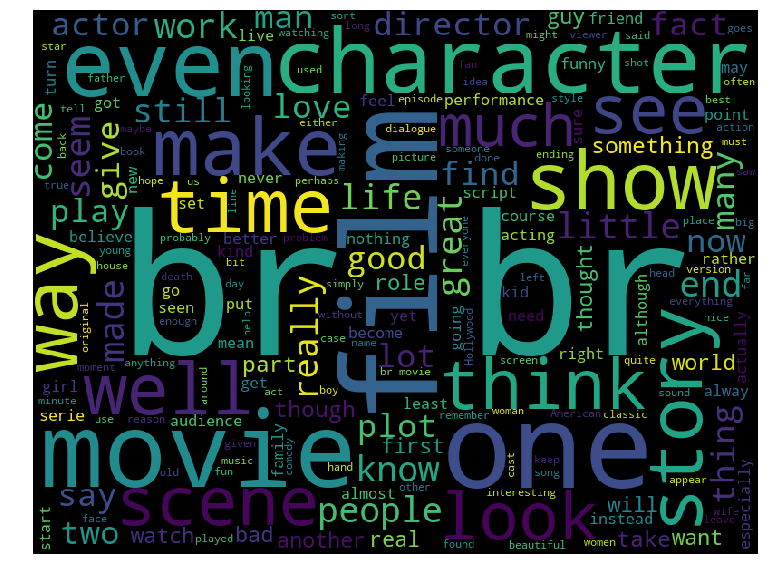

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(trainDf['review']))

plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

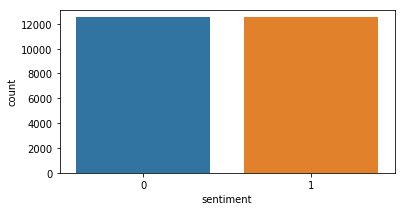

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment = trainDf['sentiment'].value_counts()
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(trainDf['sentiment'])